<a href="https://colab.research.google.com/github/vidulaarumugam/Machine-learning_vidula/blob/main/lab9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import numpy as np

In [7]:
# Merge train and test datasets
df_train =pd.read_excel('training (2).xlsx')
df_test =pd.read_excel('testing (2).xlsx')
df_combined = pd.concat([df_train, df_test], ignore_index=True)
# Remove class labels
features = df_combined.drop('Equation', axis=1)
print(features.head())


# Initialize KMeans with the desired number of clusters (k=3 or k=5)
kmeans = KMeans(n_clusters=5)  # You can change the value here to try different numbers of clusters

# Fit KMeans to your data
kmeans.fit(features)

# Get cluster labels for each sample
cluster_labels = kmeans.labels_

# Add cluster labels to your combined dataset
df_combined['cluster'] = cluster_labels

# Check the updated dataset with cluster labels
print(df_combined.head())


   output
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                            Equation  output  cluster
0  px2+px+k=0 \n7((-5)2-5)+k=0\n 7(25-5)+k=0\n140...     0.0        2
1  X= - b ± √b2 – 4ac/2a\t\nx=  - 3 ± √(3)2 -4(4)...     0.0        2
2  x2 + kx + 64=0 \nx - 8x +k =0 \nb - 4ac>= 0\n ...     0.0        2
3  "X=- b ± squareroot(b^2-4ac) /2a\n X= - (-2√2)...     0.0        2
4  X= -(-2√2)±√((2√2)^2+4(√(3 ))(2√3) )\n\n=2√2±√...     0.0        2


In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming df_combined contains your combined dataset without class labels

# Remove any non-numeric columns if necessary
numeric_data = df_combined.select_dtypes(include=['float64', 'int64'])

# Empty list to hold average distances
avg_distances = []

# Testing k values from 1 to 31
k_values = range(1, 32)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data)
    avg_distances.append(np.sqrt(kmeans.inertia_ / numeric_data.shape[0]))  # Calculate average distance

# Calculate differences in average distances to find the elbow point
differences = np.diff(avg_distances)

# Finding the elbow point where the rate of decrease slows down
elbow_point = np.argmin(differences) + 1  # Adding 1 to account for zero-based indexing

# Print average distances for each k
for k, avg_dist in zip(k_values, avg_distances):
    print(f"K = {k}, Average Euclidean Distance = {avg_dist}")

# Print the ideal k value based on the elbow method
print(f"Ideal K value based on elbow method: {elbow_point}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K = 1, Average Euclidean Distance = 1.1984342981172293
K = 2, Average Euclidean Distance = 0.6800505556479636
K = 3, Average Euclidean Distance = 0.4653669421204348
K = 4, Average Euclidean Distance = 0.3399161792589594
K = 5, Average Euclidean Distance = 0.27303690309050327
K = 6, Average Euclidean Distance = 0.22722025633209894
K = 7, Average Euclidean Distance = 0.19687772280573587
K = 8, Average Euclidean Distance = 0.16729258072494765
K = 9, Average Euclidean Distance = 0.1450588259054069
K = 10, Average Euclidean Distance = 0.1334109494289805
K = 11, Average Euclidean Distance = 0.12076006151871746
K = 12, Average Euclidean Distance = 0.10962615902921821
K = 13, Average Euclidean Distance = 0.09820800866327521
K = 14, Average Euclidean Distance = 0.0890377904741441
K = 15, Average Euclidean Distance = 0.08152982844356811
K = 16, Average Euclidean Distance = 0.07115779616528851
K = 17, Average Euclidean Distance = 0.06204949877307439
K = 18, Average Euclidean Distance = 0.05853523

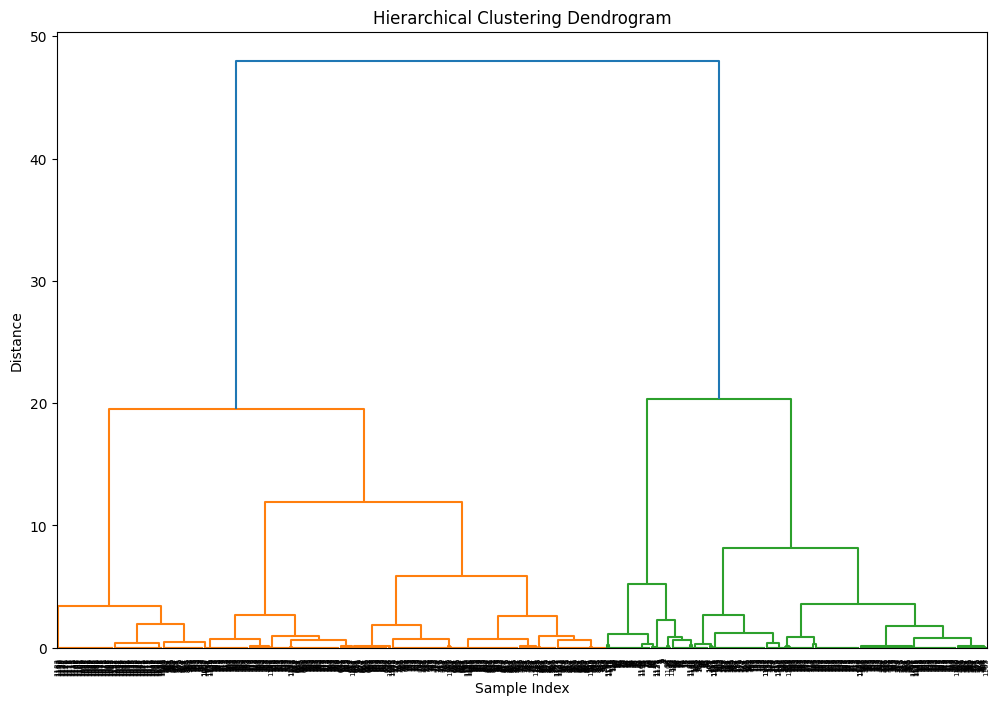

In [9]:


# Perform hierarchical clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)  # distance_threshold=0 for full dendrogram
clusters = model.fit_predict(numeric_data)

# Create linkage matrix for dendrogram
linkage_matrix = linkage(numeric_data, method='ward')  # You can change the linkage method as needed

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [10]:
data = pd.read_excel('t5_train (1).xlsx')

num_bins=4
# Assuming the last column is the target/label column
data['embed_1_b'] = pd.cut(data['embed_1'], num_bins)
data['embed_12_b'] = pd.cut(data['embed_12'], num_bins)
#for one class
X = data['embed_1']
y = data['embed_12']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
X_train_encoded = label_encoder.fit_transform(X_train)
y_train_encoded = label_encoder.fit_transform(y_train)
X_test_encoded = label_encoder.fit_transform(X_test)
X_test_encoded=X_train_encoded.reshape(-1, 1)
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_encoded=y_train_encoded.reshape(-1, 1)
X_train_encoded=X_train_encoded.reshape(-1, 1)
y_train_encoded= y_train_encoded.reshape(-1, 1)
model = LogisticRegression()

# Perform Forward Selection
sfs = SequentialFeatureSelector(model, forward=True, k_features='best', scoring='accuracy', cv=5)
sfs.fit(X_train_encoded, y_train_encoded)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Select the same features for both training and testing sets
X_train_selected = sfs.transform(X_train_encoded)
X_test_selected = sfs.transform(X_test_encoded)

# Train the model using the selected features
model.fit(X_train_selected, y_train_encoded)

# Predict using the selected features on the test set
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy with selected features: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy with selected features: 0.01220865704772475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Initialize PCA
pca = PCA()

# Fit PCA on the data
pca.fit(X)

# Calculate cumulative variance explained by each principal component
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Identify the number of components needed to capture 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # Adding 1 to get the actual count

print(f"Number of components to capture 95% variance: {n_components_95}")

Number of components to capture 95% variance: 7


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




# Perform Kernel PCA for dimensionality reduction
kpca = KernelPCA(n_components=3, kernel='rbf')  # You can choose the number of components
X_train_transformed = kpca.fit_transform(X_train_encoded)
X_test_transformed = kpca.transform(X_test_encoded)

# Train a Support Vector Machine (SVM) classifier on the transformed data
svm = SVC(kernel='linear')  # You can choose different kernels and hyperparameters
svm.fit(X_train_transformed, y_train_encoded)

# Predict using the trained model
predictions = svm.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.021087680355160933
